# Statoil/C-CORE Iceberg Classifier Challenge
## Analysis
### Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Let's import the data
trainData = pd.read_json('train.json')
testData = pd.read_json('test.json')

In [2]:
#Let's see a sample of the train data
print('Train Data Sample:\n', trainData.head())

#Let's see a sample of the test data
print('\nTest Data Sample:\n', testData.head())

Train Data Sample:
                                               band_1  \
0  [-27.878360999999998, -27.15416, -28.668615, -...   
1  [-12.242375, -14.920304999999999, -14.920363, ...   
2  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2        id inc_angle  \
0  [-27.154118, -29.537888, -31.0306, -32.190483,...  dfd5f913   43.9239   
1  [-31.506321, -27.984554, -26.645678, -23.76760...  e25388fd   38.1562   
2  [-24.870956, -24.092632, -20.653963, -19.41104...  58b2aaa0   45.2859   
3  [-27.889421, -27.519794, -27.165262, -29.10350...  4cfc3a18   43.8306   
4  [-27.206915, -30.259186, -30.259186, -23.16495...  271f93f4   35.6256   

   is_iceberg  
0           0  
1           0  
2           1  
3           0  
4           0  

Test Data Sample:
                                               band_1  \
0  [-15.863251

Number of Samples in Train Dataset:  1604
Number of Samples in Test Dataset:  8424


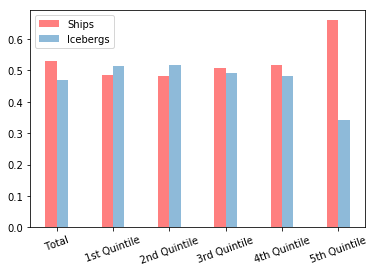

In [3]:
#Statistics about the datasets
#First total number of samples in each dataset
numberTrainSamples = len(trainData)
numberTestSamples = len(testData)
print('Number of Samples in Train Dataset: ', numberTrainSamples)
print('Number of Samples in Test Dataset: ', numberTestSamples)

# Initialize empty lists for storing the fractions of each class in train dataset
trainShips = []
trainIcebergs = []

# Calculate the fraction of each class for the total train dataset
totalTrainClassDistribution = trainData['is_iceberg'].value_counts()
trainShips.append(totalTrainClassDistribution[0]/(totalTrainClassDistribution[0]+totalTrainClassDistribution[1]))
trainIcebergs.append(totalTrainClassDistribution[1]/(totalTrainClassDistribution[0]+totalTrainClassDistribution[1]))

# Calculate the fraction of each class for each quintile of the train dataset
for i in range(5):
    trainQuintile = round(0.2*numberTrainSamples)
    classDistribution = trainData['is_iceberg'][i*trainQuintile:(i+1)*trainQuintile].value_counts()
    trainShips.append(classDistribution[0]/(classDistribution[0]+classDistribution[1]))
    trainIcebergs.append(classDistribution[1]/(classDistribution[0]+classDistribution[1]))

# Plot the fraction of each class as a paired bar chart for the total train dataset and each quintile
columns = np.arange(0,24,4)
ships = plt.bar(columns-0.8, trainShips, align='edge', color='r', alpha=0.5, linewidth = 50)
icebergs = plt.bar(columns, trainIcebergs, align='edge', alpha=0.5)
plt.xticks(columns, ['Total', '1st Quintile', '2nd Quintile', '3rd Quintile', '4th Quintile', '5th Quintile'],rotation=20)
plt.legend((ships[0], icebergs[0]), ('Ships', 'Icebergs'))
plt.autoscale(enable=True, axis='both', tight=None)
plt.savefig('Class Distribution.jpg')
plt.show()

In [4]:
# Print the statistics of the Incedence Angle for both train and test dataset
# Missing 'na' data from the train dataset not included in statistical calculations
print('Statistics on Incedence Angle Training Data:\n',trainData['inc_angle'].replace('na',np.nan).describe())
print('\nStatistics on Incedence Angle Test Data:\n',testData['inc_angle'].describe())

Statistics on Incedence Angle Training Data:
 count    1471.000000
mean       39.268707
std         3.839744
min        24.754600
25%        36.106100
50%        39.501500
75%        42.559100
max        45.937500
Name: inc_angle, dtype: float64

Statistics on Incedence Angle Test Data:
 count    8424.000000
mean       40.153403
std         4.108386
min        23.080500
25%        36.905200
50%        40.375790
75%        43.472950
max        50.661785
Name: inc_angle, dtype: float64


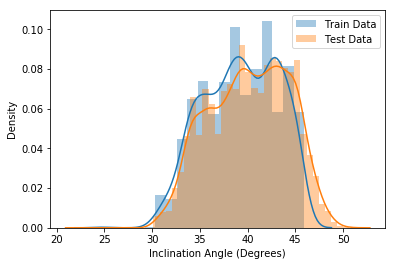

In [5]:
# Visualized the distribution of inclination in the train and test data with a histogram and kernal density estimation
sns.distplot(trainData['inc_angle'].replace('na',np.nan).dropna(), label='Train Data')
sns.distplot(testData['inc_angle'], label='Test Data')
plt.legend()
plt.xlabel('Inclination Angle (Degrees)')
plt.ylabel('Density')
plt.savefig('Inclination Angle Distribution.jpg')
plt.show()

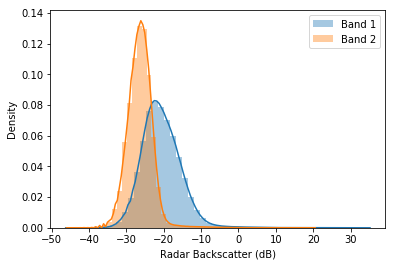

In [6]:
# Visualize the cumulative distribution of backscatter at each dB with a histogram and kernal density estimation
totalBand1 = []
totalBand2 = []
for imageVector in trainData['band_1']:
    for dB in imageVector:
        totalBand1.append(dB)
for imageVector in trainData['band_2']:
    for dB in imageVector:
        totalBand2.append(dB)
sns.distplot(totalBand1, label='Band 1')
sns.distplot(totalBand2, label='Band 2')
plt.legend()
plt.autoscale()
plt.xlabel('Radar Backscatter (dB)')
plt.ylabel('Density')
plt.savefig('Radar Backscatter Distribution.jpg')
plt.show()

### Exploratory Visualization

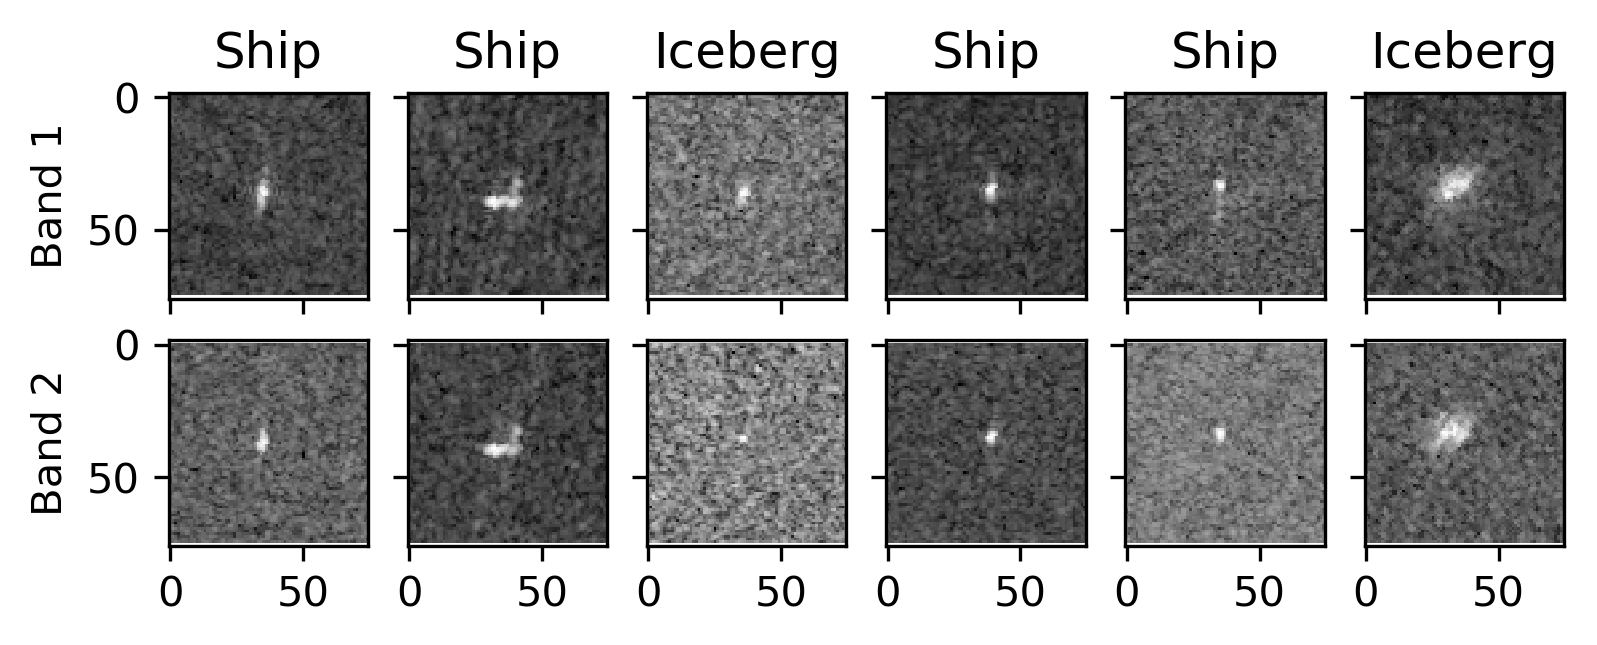

In [7]:
# Visualize the first 6 samples of the train dataset by looking at the Band 1 and Band 2 radar images
f, axarr = plt.subplots(nrows=2, ncols=6, sharex=True, sharey=True, figsize=(6,2), dpi=300)
for img in range (6):
    axarr[0, img].imshow(np.array(trainData['band_1'][img]).reshape((75,75)),cmap='binary_r')
    if trainData['is_iceberg'][img]==0:
        axarr[0, img].set_title('Ship')
    else:
        axarr[0, img].set_title('Iceberg')
    axarr[1, img].imshow(np.array(trainData['band_2'][img]).reshape((75,75)),cmap='binary_r')
axarr[0, 0].set_ylabel('Band 1')
axarr[1, 0].set_ylabel('Band 2')
plt.savefig('radar.jpg')
plt.show()

### Algorithms and Techniques

The algorithm used will be a deep neural network with convolutional layers and fully connected layers. The neural network will use L2 regularization.

### Benchmark

The benchmark will be a vanilla convolutional neural network trained on 75x75 pixel image data with 2 channels.

## Methodology
### Data Preprocessing

In this section, all of your preprocessing steps will need to be clearly documented, if any were necessary. From the previous section, any of the abnormalities or characteristics that you identified about the dataset will be addressed and corrected here. Questions to ask yourself when writing this section:
- If the algorithms chosen require preprocessing steps like feature selection or feature transformations, have they been properly documented?
- Based on the Data Exploration section, if there were abnormalities or characteristics that needed to be addressed, have they been properly corrected?
- If no preprocessing is needed, has it been made clear why?

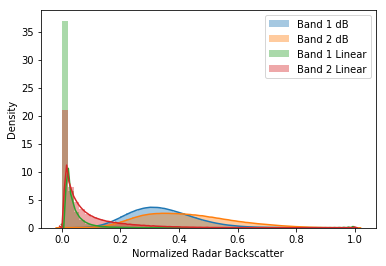

In [8]:
# The radar backscatter data is in decibels. Should the image data be normalized directly using min-max scaling?
# Or should the data be converted to a linear scale first? Min-max scaling is sensitive to outliers.
# So the data should be kept in decibels before normalization to [0,1] range. But let's visualize this.

# Initialize lists for the normalized data.
totalBand1_dB = []
totalBand2_dB = []
totalBand1_linear = []
totalBand2_linear = []

# Directly normalize to [0,1] with min-max scaling for each image.
for imageVector in trainData['band_1']:
    bandVector = np.array(imageVector)
    bandWidth = bandVector.max() - bandVector.min()
    bandVector -= bandVector.min()
    bandVector /= bandWidth
    for dB in bandVector:
        totalBand1_dB.append(dB)
for imageVector in trainData['band_2']:
    bandVector = np.array(imageVector)
    bandWidth = bandVector.max() - bandVector.min()
    bandVector -= bandVector.min()
    bandVector /= bandWidth
    for dB in bandVector:
        totalBand2_dB.append(dB)

# Convert the dB to the linear scale and then normalize to [0,1] with min-max scaling for each image.
for imageVector in trainData['band_1']:
    bandVector = np.array(imageVector)
    bandVector = 10**(bandVector/10)
    bandWidth = bandVector.max() - bandVector.min()
    bandVector -= bandVector.min()
    bandVector /= bandWidth
    for dB in bandVector:
        totalBand1_linear.append(dB)
for imageVector in trainData['band_2']:
    bandVector = np.array(imageVector)
    bandVector = 10**(bandVector/10)
    bandWidth = bandVector.max() - bandVector.min()
    bandVector -= bandVector.min()
    bandVector /= bandWidth
    for dB in bandVector:
        totalBand2_linear.append(dB)

# Visualize the cumulative distribution of backscatter on the normalized scale with a histogram and kernal density estimation.
sns.distplot(totalBand1_dB, label='Band 1 dB')
sns.distplot(totalBand2_dB, label='Band 2 dB')
sns.distplot(totalBand1_linear, label='Band 1 Linear')
sns.distplot(totalBand2_linear, label='Band 2 Linear')
plt.legend()
plt.autoscale()
plt.xlabel('Normalized Radar Backscatter')
plt.ylabel('Density')
plt.savefig('Normalized Backscatter Distribution.jpg')
plt.show()

In [87]:
# As we could see from the KDE graph above, the backscatter data should be normalized directly to [0,1].
# Below is a function that takes in band data. For each image in the band data, it reshapes it to a 150x150 matrix.
# It needs to be converted to 150x150 pixels from 75x75 pixels so that InceptionResNetV2 can be used.
# The single channel input is duplicated in all three channels of the array for input to InceptionResNetV2.
# It then appends it to an array of fourth-order tensor of the form [samples, rows, columns, channels]

# def makeRadarImage(band):
#     radarImage = np.empty([1,150,150,3])
#     for vector in band:
#         bandVector = np.array(vector)
#         bandVector = (bandVector - bandVector.min()) / (bandVector.max() - bandVector.min())
#         bandMatrix = np.zeros((150,150))
#         row = 0
#         element = 0
#         while row < 75:
#             column = 0
#             while column < 75:
#                 bandMatrix[2*row,2*column] = bandVector[element]
#                 bandMatrix[2*row+1,2*column] = bandVector[element]
#                 bandMatrix[2*row,2*column+1] = bandVector[element]
#                 bandMatrix[2*row+1,2*column+1] = bandVector[element]
#                 element += 1
#                 column += 1
#             row += 1
#         bandMatrix = np.dstack((bandMatrix, bandMatrix, bandMatrix))
#         bandMatrix = np.expand_dims(bandMatrix, axis=0)
#         radarImage = np.concatenate((radarImage, bandMatrix))
#     radarImage = np.delete(radarImage, 0, 0)
#     return radarImage

In [9]:
# Below is a function that takes in band data. For each image in the band data, it reshapes it to a 75x75 matrix.
# It then appends it to an array of fourth-order tensor of the form [samples, rows, columns, channels]

def makeRadarImage(band):
    radarImage = np.empty([1,75,75,3])
    for vector in band:
        bandMatrix = np.array(vector).reshape((75, 75))
        bandMatrix = (bandMatrix - bandMatrix.min()) / (bandMatrix.max() - bandMatrix.min())
        bandMatrix = np.dstack((bandMatrix, bandMatrix, bandMatrix))
        bandMatrix = np.expand_dims(bandMatrix, axis=0)
        radarImage = np.concatenate((radarImage, bandMatrix))
    radarImage = np.delete(radarImage, 0, 0)
    return radarImage

In [10]:
# Save the normalized radar backscatter data

bandOneTrain = makeRadarImage(trainData['band_1'])
bandTwoTrain = makeRadarImage(trainData['band_2'])

In [11]:
# We have missing values for the inclination angle feature in the train data.
# Filtering out the data may introduce bias.
# Setting the missing values to 0, -1, mean, or median will make the data noisy
# The best option is to set the missing values such that they are consistent with the patterns in the other features
# To do that, we need to learn the inclination angle from the other data and make predictions for the missing values.

trainData['inc_angle'] = trainData['inc_angle'].replace('na',np.nan)

trainData_noNaN = trainData.dropna()
trainData_NaN = trainData.drop(trainData_noNaN.index)

bandOneTrain_noNaN = makeRadarImage(trainData_noNaN['band_1'])
bandTwoTrain_noNaN = makeRadarImage(trainData_noNaN['band_2'])
icebergOrShipTrain_noNaN = np.array(trainData_noNaN['is_iceberg'], dtype=float)

incAngleTrain_noNaN = np.array(trainData_noNaN['inc_angle'], dtype=float)

incAngleMean = incAngleTrain_noNaN.mean(dtype=np.float64)
incAngleStd = incAngleTrain_noNaN.std(dtype=np.float64)

In [12]:
def normalizeIncAngle(array):
    array -= incAngleMean
    array /= incAngleStd
    return array

In [13]:
incAngleTrain_noNaN = normalizeIncAngle(incAngleTrain_noNaN)

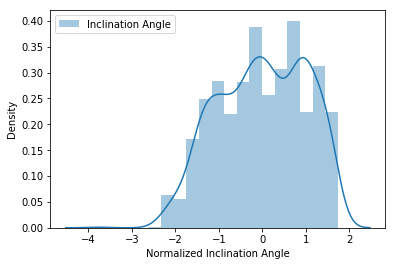

In [14]:
sns.distplot(incAngleTrain_noNaN, label='Inclination Angle')
plt.legend()
plt.autoscale()
plt.xlabel('Normalized Inclination Angle')
plt.ylabel('Density')
plt.savefig('Normalized Inclination Angle Distribution.jpg')
plt.show()

In [15]:
#Define the model architecture
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras import optimizers
from keras.applications.xception import Xception

band1 = Input(shape=(75,75,3))
band2 = Input(shape=(75,75,3))
isIceberg = Input(shape=(1,))

conv1 = Xception(include_top=False, weights=None, input_tensor=band1, input_shape=(75,75,3), pooling='avg')
conv2 = Xception(include_top=False, weights=None, input_tensor=band2, input_shape=(75,75,3), pooling='avg')

merge = keras.layers.concatenate([conv1.output, conv2.output, isIceberg])

mlp = Dense(64, activation='relu')(merge)
mlp = Dense(64, activation='relu')(mlp)
mlp = Dense(64, activation='relu')(mlp)

output = Dense(1, activation='linear')(mlp)

for layer in range(len(conv1.layers)):
    conv1.get_layer(index=layer).name=str(layer) # this was adapted from https://stackoverflow.com/questions/43452441/keras-all-layer-names-should-be-unique

model = Model(inputs=[band1, band2, isIceberg], outputs=output)

#Compile the model
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=adam, loss='mean_squared_error')

model.summary()

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
0 (InputLayer)                   (None, 75, 75, 3)     0                                            
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, 75, 75, 3)     0                                            
____________________________________________________________________________________________________
1 (Conv2D)                       (None, 37, 37, 32)    864         0[0][0]                          
____________________________________________________________________________________________________
block1_conv1 (Conv2D)            (None, 37, 37, 32)    864         input_2[0][0]                    
___________________________________________________________________________________________

In [16]:
#Train the model
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='weights.best.incAngle.hdf5', verbose=1, save_best_only=True)

In [17]:
model.fit([bandOneTrain_noNaN, bandTwoTrain_noNaN, icebergOrShipTrain_noNaN], [incAngleTrain_noNaN], batch_size=42, epochs=50, verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=False)

Train on 1176 samples, validate on 295 samples
Epoch 1/50
1176/1176 [==============================] - 342s - loss: 1.0517 - val_loss: 1.1069
Epoch 2/50
1176/1176 [==============================] - 309s - loss: 0.9299 - val_loss: 1.1078
Epoch 3/50
  42/1176 [>.............................] - ETA: 278s - loss: 0.7916

KeyboardInterrupt: 

### Implementation

In this section, the process for which metrics, algorithms, and techniques that you implemented for the given data will need to be clearly documented. It should be abundantly clear how the implementation was carried out, and discussion should be made regarding any complications that occurred during this process. Questions to ask yourself when writing this section:
- Is it made clear how the algorithms and techniques were implemented with the given datasets or input data?
- Were there any complications with the original metrics or techniques that required changing prior to acquiring a solution?
- Was there any part of the coding process (e.g., writing complicated functions) that should be documented?

### Refinement

In this section, you will need to discuss the process of improvement you made upon the algorithms and techniques you used in your implementation. For example, adjusting parameters for certain models to acquire improved solutions would fall under the refinement category. Your initial and final solutions should be reported, as well as any significant intermediate results as necessary. Questions to ask yourself when writing this section:
- Has an initial solution been found and clearly reported?
- Is the process of improvement clearly documented, such as what techniques were used?
- Are intermediate and final solutions clearly reported as the process is improved?

## Results
### Model Evaluation and Validation

In this section, the final model and any supporting qualities should be evaluated in detail. It should be clear how the final model was derived and why this model was chosen. In addition, some type of analysis should be used to validate the robustness of this model and its solution, such as manipulating the input data or environment to see how the model’s solution is affected (this is called sensitivity analysis). Questions to ask yourself when writing this section:
- Is the final model reasonable and aligning with solution expectations? Are the final parameters of the model appropriate?
- Has the final model been tested with various inputs to evaluate whether the model generalizes well to unseen data?
- Is the model robust enough for the problem? Do small perturbations (changes) in training data or the input space greatly affect the results?
- Can results found from the model be trusted?

### Justification

In this section, your model’s final solution and its results should be compared to the benchmark you established earlier in the project using some type of statistical analysis. You should also justify whether these results and the solution are significant enough to have solved the problem posed in the project. Questions to ask yourself when writing this section:
- Are the final results found stronger than the benchmark result reported earlier?
- Have you thoroughly analyzed and discussed the final solution?
- Is the final solution significant enough to have solved the problem?

## Conclusion
### Free-Form Visualization

In this section, you will need to provide some form of visualization that emphasizes an important quality about the project. It is much more free-form, but should reasonably support a significant result or characteristic about the problem that you want to discuss. Questions to ask yourself when writing this section:
- Have you visualized a relevant or important quality about the problem, dataset, input data, or results?
- Is the visualization thoroughly analyzed and discussed?
- If a plot is provided, are the axes, title, and datum clearly defined?

### Reflection

In this section, you will summarize the entire end-to-end problem solution and discuss one or two particular aspects of the project you found interesting or difficult. You are expected to reflect on the project as a whole to show that you have a firm understanding of the entire process employed in your work. Questions to ask yourself when writing this section:
- Have you thoroughly summarized the entire process you used for this project?
- Were there any interesting aspects of the project?
- Were there any difficult aspects of the project?
- Does the final model and solution fit your expectations for the problem, and should it be used in a general setting to solve these types of problems?

### Improvement

In this section, you will need to provide discussion as to how one aspect of the implementation you designed could be improved. As an example, consider ways your implementation can be made more general, and what would need to be modified. You do not need to make this improvement, but the potential solutions resulting from these changes are considered and compared/contrasted to your current solution. Questions to ask yourself when writing this section:
- Are there further improvements that could be made on the algorithms or techniques you used in this project?
- Were there algorithms or techniques you researched that you did not know how to implement, but would consider using if you knew how?
- If you used your final solution as the new benchmark, do you think an even better solution exists?

## Let's define some functions for vectorizing the data:

In [5]:
incTrain = vectorizeInc(trainData['inc_angle'])
trainTargets = np.array(trainData['is_iceberg'], dtype=float)

C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [6]:
#Define the model architecture
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model

band1 = Input(shape=(75,75,1))
band2 = Input(shape=(75,75,1))
inc = Input(shape=(1,))

convolution1 = Conv2D(filters=16, kernel_size=2, padding='valid', activation='relu', input_shape=(75, 75, 2))(band1)
convolution1 = MaxPooling2D(pool_size=2, strides=2, padding='valid')(convolution1)
convolution1 = Conv2D(filters=32, kernel_size=2, padding='valid', activation='relu')(convolution1)
convolution1 = MaxPooling2D(pool_size=2, strides=2, padding='valid')(convolution1)
convolution1 = Conv2D(filters=64, kernel_size=2, padding='valid', activation='relu')(convolution1)
convolution1 = MaxPooling2D(pool_size=2, strides=2, padding='valid')(convolution1)
convolution1 = GlobalAveragePooling2D()(convolution1)

convolution2 = Conv2D(filters=16, kernel_size=2, padding='valid', activation='relu', input_shape=(75, 75, 2))(band2)
convolution2 = MaxPooling2D(pool_size=2, strides=2, padding='valid')(convolution2)
convolution2 = Conv2D(filters=32, kernel_size=2, padding='valid', activation='relu')(convolution2)
convolution2 = MaxPooling2D(pool_size=2, strides=2, padding='valid')(convolution2)
convolution2 = Conv2D(filters=64, kernel_size=2, padding='valid', activation='relu')(convolution2)
convolution2 = MaxPooling2D(pool_size=2, strides=2, padding='valid')(convolution2)
convolution2 = GlobalAveragePooling2D()(convolution2)

merge = keras.layers.concatenate([convolution1, convolution2, inc])

mlp = Dense(64, activation='relu')(merge)
mlp = Dense(64, activation='relu')(mlp)
mlp = Dense(64, activation='relu')(mlp)

output = Dense(1, activation='sigmoid')(mlp)

model = Model(inputs=[band1, band2, inc], outputs=output)

#Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 75, 75, 1)     0                                            
____________________________________________________________________________________________________
input_5 (InputLayer)             (None, 75, 75, 1)     0                                            
____________________________________________________________________________________________________
conv2d_7 (Conv2D)                (None, 74, 74, 16)    80          input_4[0][0]                    
____________________________________________________________________________________________________
conv2d_10 (Conv2D)               (None, 74, 74, 16)    80          input_5[0][0]                    
___________________________________________________________________________________________

In [9]:
#Train the model
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

# # create and configure augmented image generator
# datagen_train = ImageDataGenerator(
#     width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
#     height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
#     horizontal_flip=True) # randomly flip images horizontally

# # create and configure augmented image generator
# datagen_valid = ImageDataGenerator(
#     width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
#     height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
#     horizontal_flip=True) # randomly flip images horizontally

# # fit augmented image generator on data
# datagen_train.fit(train_tensors)
# datagen_valid.fit(valid_tensors)

# epochs = 5
# batch_size = 20

checkpointer = ModelCheckpoint(filepath='weights.best.iceberg.hdf5',
                               verbose=1, save_best_only=True)

# model.fit_generator(datagen_train.flow(train_tensors, train_targets, batch_size=batch_size),
#                     steps_per_epoch=train_tensors.shape[0] // batch_size,
#                     epochs=epochs, verbose=2, callbacks=[checkpointer],
#                     validation_data=datagen_valid.flow(valid_tensors, valid_targets, batch_size=batch_size),
#                     validation_steps=valid_tensors.shape[0] // batch_size)

In [10]:
# model.fit([bandOneTrain, bandTwoTrain, incTrain], [trainTargets], epochs=50, batch_size=32)

model.fit([bandOneTrain, bandTwoTrain, incTrain], [trainTargets], batch_size=32, epochs=50, verbose=1, callbacks=[checkpointer], validation_split=0.1)

Train on 1443 samples, validate on 161 samples
Epoch 1/50
1443/1443 [==============================] - 6s - loss: 0.5383 - acc: 0.7339 - val_loss: 0.3168 - val_acc: 0.8385
Epoch 2/50
1443/1443 [==============================] - 6s - loss: 0.5243 - acc: 0.7353 - val_loss: 0.2562 - val_acc: 0.8758
Epoch 3/50
1443/1443 [==============================] - 6s - loss: 0.5090 - acc: 0.7588 - val_loss: 0.2944 - val_acc: 0.8696
Epoch 4/50
1443/1443 [==============================] - 6s - loss: 0.4949 - acc: 0.7491 - val_loss: 0.2666 - val_acc: 0.8571
Epoch 5/50
1443/1443 [==============================] - 6s - loss: 0.4725 - acc: 0.7720 - val_loss: 0.2618 - val_acc: 0.8696
Epoch 6/50
1443/1443 [==============================] - 6s - loss: 0.4588 - acc: 0.7796 - val_loss: 0.2078 - val_acc: 0.9193
Epoch 7/50
1443/1443 [==============================] - 6s - loss: 0.4532 - acc: 0.7824 - val_loss: 0.1760 - val_acc: 0.9255
Epoch 8/50
1443/1443 [==============================] - 6s - loss: 0.4272 - ac

In [11]:
model.load_weights('weights.best.iceberg.hdf5')

In [24]:
testData = pd.read_json('test.json')
bandOneTest = makeRadarImage(testData['band_1'])
bandTwoTest = makeRadarImage(testData['band_2'])
incTest = vectorizeInc(testData['inc_angle'])
idTest = np.array(testData['id'])

C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [70]:
is_iceberg = model.predict([bandOneTest, bandTwoTest, incTest])
is_iceberg = np.reshape(is_iceberg, -1)

In [71]:
results = pd.DataFrame({'id': idTest.tolist(), 'is_iceberg': is_iceberg.tolist()})

In [72]:
results

,id,is_iceberg
0,5941774d,1.169042e-01
1,4023181e,1.029311e-02
2,b20200e4,1.659491e-06
3,e7f018bb,9.932445e-01
4,4371c8c3,1.149922e-03
5,a8d9b1fd,8.322907e-03
6,29e7727e,5.239334e-02
7,92a51ffb,9.968128e-01
8,c769ac97,5.401850e-05
9,aee0547d,4.974816e-05


In [74]:
results.to_csv('results.csv', index=False)